<a href="https://colab.research.google.com/github/LiliValGo/carbon_produccion_contraprestaciones_colombia/blob/main/proyecto_carbon_col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARBÓN Y CONTRAPRESTACIONES ECONÓMICAS EN COLOMBIA**

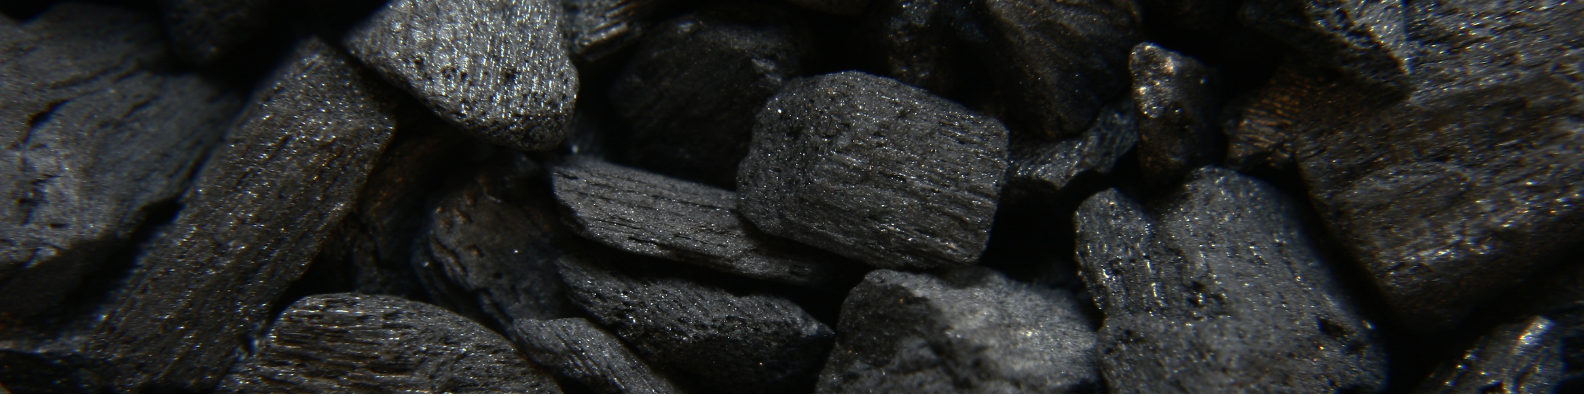

## **OBJETIVO:** 
Analizar el comportamiento de la producción de carbón y el monto de las contraprestaciones generadas a favor del Estado Colombiano dentro del periodo 2012-2020

El conjunto de datos con el cual estarémos trabajando fue extraído de la página oficial de la [Agencia Nacional Minera - ANM](https://www.datos.gov.co/Minas-y-Energ-a/ANM-Producci-n-Nacional-de-Minerales-y-Contraprest/r85m-vv6c)

## Importando paquetes y librerías 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime 

## Importando y leyendo data sets de estudio y validación 

In [ ]:
df_produc_carbon = pd.read_csv('https://raw.githubusercontent.com/LiliValGo/Produccion-Carbon-Colombia/main/produccion_carbon_col.csv')
df_produc_carbon.sort_values('Año Produccion', inplace=True)
df_produc_carbon


,Codigo DANE,Municipio Productor,Departamento,Recurso Natural,Nombre Del Proyecto,Año Produccion,Trimestre,Unidad Medida,Tipo Contraprestacion,Valor Contraprestacion,Cantidad Producción
4412,68266,Enciso,Santander,CARBON,PRODUCTORES,2012,Trimestre 3,TONELADAS,REGALIA,5.213190e+05,225
4134,54673,San Cayetano - Norte de Santander,Norte de Santander,CARBON,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIA,1.079929e+08,18554
4378,68235,El Carmen de Chucuri,Santander,CARBON,PRODUCTORES,2012,Trimestre 2,TONELADAS,REGALIA,2.152635e+08,39885
2890,25486,Nemocon,Cundinamarca,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,3.140816e+06,789
2888,25486,Nemocon,Cundinamarca,CARBON,PRODUCTORES,2012,Trimestre 3,TONELADAS,REGALIA,1.341766e+06,337
...,...,...,...,...,...,...,...,...,...,...,...
2344,20400,La Jagua de Ibirico,Cesar,CARBON,Drummond - La Loma,2020,Trimestre 1,TONELADAS,REGALIA,3.167624e+10,849219
1749,19780,Suarez - Cauca,Cauca,CARBON,PRODUCTORES,2020,Trimestre 3,TONELADAS,REGALIA,7.881350e+05,115
665,15464,Mongua,Boyaca,CARBON,PRODUCTORES,2020,Trimestre 4,TONELADAS,REGALIA,2.356125e+07,3578
4009,54377,Labateca,Norte de Santander,CARBON,PRODUCTORES,2020,Trimestre 3,TONELADAS,REGALIA,2.094501e+07,2593


## Cantidad de observaciones y variables

In [ ]:
df_produc_carbon.shape

(4585, 11)

### **Registros de la columna Minicipios**

In [ ]:
print(len(np.unique(df_produc_carbon['Municipio Productor'])))

129


# Editando estructura del DataFrame 

### **Eliminando variables** 

In [ ]:
df_produc_carbon.drop(['Codigo DANE', 'Recurso Natural', 'Unidad Medida'], axis=1, inplace=True)
df_produc_carbon.head()

,Municipio Productor,Departamento,Nombre Del Proyecto,Año Produccion,Trimestre,Tipo Contraprestacion,Valor Contraprestacion,Cantidad Producción
4412,Enciso,Santander,PRODUCTORES,2012,Trimestre 3,REGALIA,521319.0,225
4134,San Cayetano - Norte de Santander,Norte de Santander,PRODUCTORES,2012,Trimestre 1,REGALIA,107992862.0,18554
4378,El Carmen de Chucuri,Santander,PRODUCTORES,2012,Trimestre 2,REGALIA,215263493.0,39885
2890,Nemocon,Cundinamarca,PRODUCTORES,2012,Trimestre 4,REGALIA,3140816.0,789
2888,Nemocon,Cundinamarca,PRODUCTORES,2012,Trimestre 3,REGALIA,1341766.0,337


Nota: La función query() no corre cuando el nombre de la variable tiene espacios entre palabras. Es por eso que es necesario renombrarlas.  

---



### **Editando nombre de las columnas**

In [ ]:
df_produc_carbon.columns = ['Municipio', 'Departamento', 'Nombre_Proyecto', 'Año_Produccion', 'Trimestre',  'Tipo_Contraprestacion', 
                            'Valor_Contraprestacion', 'Cantidad_Produccion']
df_produc_carbon.head()

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
4412,Enciso,Santander,PRODUCTORES,2012,Trimestre 3,REGALIA,521319.0,225
4134,San Cayetano - Norte de Santander,Norte de Santander,PRODUCTORES,2012,Trimestre 1,REGALIA,107992862.0,18554
4378,El Carmen de Chucuri,Santander,PRODUCTORES,2012,Trimestre 2,REGALIA,215263493.0,39885
2890,Nemocon,Cundinamarca,PRODUCTORES,2012,Trimestre 4,REGALIA,3140816.0,789
2888,Nemocon,Cundinamarca,PRODUCTORES,2012,Trimestre 3,REGALIA,1341766.0,337


### **Editando valores de la columna: 'Municipio' de nuestro DataFrame de estudio** 

Nuestro Dataset del Mineral Carbon presenta en la columna de 'Municipio' una **NO homogeneidad** en la descripción de los datos. Algunos Municipios venian acompañados por el departamento al que pertenecian aunque existe una columna especifica para el 'Departamento'. 

El primer paso fue: 

1. Identificar los municipios a actualizar.
2. Reemplazar los valores con el método **.replace()**

In [ ]:
munucipios_actualizados_carbon = df_produc_carbon['Municipio'].replace({
                                                                        'Toledo - Antioquia': 'Toledo', 'Venecia - Antioquia': 'Venecia',
                                                                        'Boyaca - Boyaca': 'Boyaca', 'Briceño - Boyaca': 'Briceño',
                                                                        'Jerico - Boyaca': 'Jerico', 'El Tambo - Cauca': 'El Tambo', 
                                                                        'Morales - Cauca': 'Morales', 'Santa Maria - Boyaca': 'Santa Maria',
                                                                        'Suarez - Cauca': 'Suarez', 'San Cayetano - Cundinamarca': 'San Cayetano', 
                                                                        'Albania - La Guajira': 'Albania', 'Arboledas - Norte de Santander':'Arboledas',
                                                                        'San Cayetano - Norte de Santander': 'San Cayetano', 'Santiago - Norte de Santander': 'Santiago', 
                                                                        'Toledo - Norte de Santander': 'Toledo', 'Albania - Santander': 'Albania',
                                                                        'San Miguel - Santander': 'San Miguel'
                                                                        })

3. Asignar los nuevos datos a la columna 'Municipio' del Dataframe: 'df_produc_carbon'

In [ ]:
df_produc_carbon['Municipio'] = munucipios_actualizados_carbon

4. Verificar que la actualización se llevará a cabo 

In [ ]:
df_produc_carbon['Municipio'].unique()

array(['Enciso', 'San Cayetano', 'El Carmen de Chucuri', 'Nemocon',
       'Gameza', 'Arboledas', 'La Jagua de Ibirico', 'Barrancas',
       'Albania', 'El Tambo', 'Chitaga', 'El Paso', 'Raquira',
       'Puerto Libertador', 'Sogamoso', 'Samaca', 'Duitama', 'Salazar',
       'Patia', 'El Espino', 'Pacho', 'Macheta', 'Buenos Aires', 'Iza',
       'Cogua', 'Chinacota', 'Susacon', 'Capitanejo', 'Caparrapi',
       'Cajibio', 'Guacamayas', 'Cucaita', 'Suarez', 'Subachoque',
       'Corrales', 'Socha', 'Agustin Codazzi', 'Guavata', 'Landazuri',
       'Chivata', 'Cucuta', 'Combita', 'Motavita', 'Durania',
       'Lenguazaque', 'Villa del Rosario', 'Guatavita', 'Tibana',
       'Mongua', 'Paipa', 'Tuta', 'Bochalema', 'Cucunuba', 'Tibu',
       'Cacota', 'Topaga', 'Santiago', 'Jerusalen', 'Tasco', 'Guacheta',
       'Sardinata', 'Mongui', 'Turmeque', 'Nuevo Colon', 'Nobsa',
       'Suesca', 'Paz de Rio', 'Toledo', 'Jerico', 'Ventaquemada',
       'Umbita', 'La Uvita', 'Sativanorte', 'Los Pati

In [ ]:
df_produc_carbon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4585 entries, 4412 to 4336
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Municipio               4585 non-null   object 
 1   Departamento            4585 non-null   object 
 2   Nombre_Proyecto         4585 non-null   object 
 3   Año_Produccion          4585 non-null   int64  
 4   Trimestre               4585 non-null   object 
 5   Tipo_Contraprestacion   4585 non-null   object 
 6   Valor_Contraprestacion  4585 non-null   float64
 7   Cantidad_Produccion     4585 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 322.4+ KB


### **Transformando tipo de datos**

In [ ]:
"""ESTE CODIGO NO SE EMPLEO PARA TRANFORMAR NUESTRA VARIABLE Año_Produccio"""
#df_produc_carbon['Año_Produccion'] = pd.to_datetime(df_produc_carbon['Año_Produccion'])

'ESTE CODIGO NO SE EMPLEO PARA TRANFORMAR NUESTRA VARIABLE Año_Produccio'

# **Descripción de los datos**

###**Numéricos** 


*   **Discretos:** Cuando toman solo valores enteros.
*   **Continuos:** Cuando pueden tomar cualquier valor dentro de un intervalo 

###**Categóricos**


*   **Nominales:** Se usan para etiquetar el dato pero no pueden ser ordenados ni medidos 
*   **Binarios:** Representan datos de una o dos posibles categorias 
*   **Ordinales:** Corresponden al orden en el que vienen representandos los datos 






## Numéricos
**Continuos**

*   Valor_Contraprestacion
*   Cantidad_Produccion


## Categóricos
**Nominales**

*   Id_DANE
*   Municipio
*   Departamento
*   Mineral
*   Nombre_Proyecto
*   Unid_Medida

**Binarios**
*   Tipo_Contraprestacion

**Ordinales**

*   Trimestre






## **Explorando nuestros datos**

In [ ]:
df_produc_carbon.Municipio.value_counts(normalize=True)

La Jagua de Ibirico    0.083315
Barrancas              0.058670
Becerril               0.043621
Albania                0.040349
Socha                  0.025518
                         ...   
Yacopi                 0.000218
El Espino              0.000218
Cota                   0.000218
Aguada                 0.000218
Chiquinquira           0.000218
Name: Municipio, Length: 126, dtype: float64

**Valores Nulos**

In [ ]:
df_produc_carbon.isnull().sum()

Municipio                 0
Departamento              0
Nombre_Proyecto           0
Año_Produccion            0
Trimestre                 0
Tipo_Contraprestacion     0
Valor_Contraprestacion    0
Cantidad_Produccion       0
dtype: int64

 **Descripción estadistica de los datos**

In [ ]:
df_produc_carbon.describe(include=['O'])

,Municipio,Departamento,Nombre_Proyecto,Trimestre,Tipo_Contraprestacion
count,4585,4585,4585,4585,4585
unique,126,11,17,4,2
top,La Jagua de Ibirico,Boyaca,PRODUCTORES,Trimestre 4,REGALIA
freq,382,1538,3011,1263,4194


In [ ]:
df_produc_carbon.describe()

,Año_Produccion,Valor_Contraprestacion,Cantidad_Produccion
count,4585.000000,4.585000e+03,4.585000e+03
mean,2016.113413,3.015486e+09,1.645682e+05
std,2.562101,7.902965e+09,5.061569e+05
min,2012.000000,0.000000e+00,0.000000e+00
25%,2014.000000,1.225035e+07,7.990000e+02
50%,2016.000000,7.597675e+07,6.141000e+03
75%,2018.000000,1.020844e+09,7.064400e+04
max,2020.000000,1.554650e+11,6.703987e+06


**NOTA:** A pesar de que en la consulta de los valores nulos (isnull()) nos dijo que tenemos cero valores nulos en nuestro Dataframe, podemos ver que en el describe() tenemos valores mínimos = 0. Esto significa, que no todo valor 0 es nulo, sino que es un dato que fue puesto intencionalmente y su explicación viene dada por el conocimiento del negocio. 

**NOTA:** Se puede observar que la media (mean) del 'Valor_Contraprestacion' es de 3 mil billones quince mil cuatrocientos ochenta y seis millones mientras que la desviacion estandar se ubica en en los 7 billones novecientos dos mil novecientos sesenta y cinco millones con una diferencia de mas de 4 mil billones. Esto significa que nuestros datos tienen una alta variabilidad y es precisamente por esto, que la desviación estandar es más alta que la media.

---



**NOTA:** La desviación estandar y la media en relación con la variable de 'Cantidad_Produccion' tienen una alta diferencia, lo que se traduce en datos altamente dispersos.  

## **Exploración de Datos sobre la producción de Carbón**

### **Valores únicos de nuestras variables**

In [ ]:
df_produc_carbon['Tipo_Contraprestacion'].unique()

array(['REGALIA', 'COMPENSACION'], dtype=object)

In [ ]:
df_produc_carbon['Departamento'].unique()

array(['Santander', 'Norte de Santander', 'Cundinamarca', 'Boyaca',
       'Cesar', 'La Guajira', 'Cauca', 'Cordoba', 'Valle del Cauca',
       'Antioquia', 'Casanare'], dtype=object)

In [ ]:
df_produc_carbon['Año_Produccion'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

## **Explorando los datos con valor 0**

**Usando método query()**

**Variable: 'Valor_Contraprestacion'**

In [ ]:
#df_produc_carbon[(df_produc_carbon.Valor_Contraprestacion == 0.0)]

In [ ]:
df_produc_carbon.query('Valor_Contraprestacion == 0.0')

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
2058,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 1,REGALIA,0.0,831477
2052,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 1,REGALIA,0.0,860789
2338,La Jagua de Ibirico,Cesar,Drummond - La Loma,2014,Trimestre 1,REGALIA,0.0,866341
2347,La Jagua de Ibirico,Cesar,Drummond - La Loma,2014,Trimestre 1,REGALIA,0.0,1085848
3534,Barrancas,La Guajira,CARBONES DEL CERREJON COMUNIDAD - RPP,2017,Trimestre 2,REGALIA,0.0,51050
3500,Barrancas,La Guajira,CARBONES DEL CERREJON COMUNIDAD - RPP,2017,Trimestre 1,REGALIA,0.0,71308
3605,Hatonuevo,La Guajira,CERREJON - PATILLA,2018,Trimestre 1,REGALIA,0.0,797163
2218,La Jagua de Ibirico,Cesar,PRODECO - CALENTURITAS,2018,Trimestre 1,REGALIA,0.0,467110
1849,Becerril,Cesar,PRODECO - CALENTURITAS,2018,Trimestre 1,REGALIA,0.0,206907


## **Conociendo el negocio**

In [ ]:
df_produc_carbon[(df_produc_carbon.Año_Produccion == 2020) & (df_produc_carbon.Cantidad_Produccion == 0) & (df_produc_carbon.Tipo_Contraprestacion == 'REGALIA')]

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
3158,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 1,REGALIA,2.627624e+09,0
3342,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 2,REGALIA,3.240179e+09,0
3346,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 2,REGALIA,3.898445e+09,0
3350,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 3,REGALIA,5.178812e+09,0
3357,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 3,REGALIA,4.192806e+09,0
3329,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 1,REGALIA,8.595206e+09,0
3361,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 4,REGALIA,1.687146e+08,0
3332,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 1,REGALIA,8.495593e+09,0
3335,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 1,REGALIA,7.142633e+09,0
3338,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 2,REGALIA,7.652587e+09,0


In [ ]:
#df_produc_carbon[(df_produc_carbon.Año_Produccion == 2014) & (df_produc_carbon.Municipio == "Chiriguana")]


In [ ]:
df_produc_carbon.query('Año_Produccion == 2014 and Municipio	== "Chiriguana"')


,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
2058,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 1,REGALIA,0.000000e+00,831477
2052,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 1,REGALIA,0.000000e+00,860789
2046,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 1,REGALIA,4.145005e+09,617637
2070,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 2,REGALIA,6.512864e+09,380090
2076,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 2,REGALIA,8.711206e+09,483825
2082,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 3,REGALIA,9.210779e+09,403806
2064,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 2,REGALIA,4.526236e+09,704865
2086,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 3,REGALIA,8.817959e+09,440997
2108,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 4,REGALIA,1.255237e+10,581490
2098,Chiriguana,Cesar,Drummond - La Loma,2014,Trimestre 4,REGALIA,9.194877e+09,461730


En el filtro anterior, cuando se filtro los registros  0 de la variable 'Valor_Contraprestacion' nos encontramos con el caso del Municipio de Chiriguana(Cesar), el cual nos mostraba 2 registros diferentes en la variable: 'Cantidad_Produccion' para la etiqueta de 'Trimestre 1'. Es decir, 2 registros con 'Trimestre 1' con dos diferentes cantidades de producción.

Veamos el caso Chiriguana más a detalle: 

Analizando detenidamente, tenemos 3 oberveciones para cada uno de los trimestres(Trimestre 1, Trimestre 2, Trimestre 3, Trimestre 4) del año 2014. Es decir que la observacion de Trimestre 1 = Enero, Trimestre 1 = Febrero, Trimestre 1= Marzo; el trimestre 2 estaría compuesto por los meses de abril, mayo y junio, y así sucesivamente para los siguientes 2 trimestres y meses. 

Se observa que los primeres meses (Enero y Febrero) del Trimestre 1, no se ha liquidado su correspondiente 'Valor_Contraprestacion'. Según lo establecido en la Resolucion 0855 de 2013 en su articulo 3°, la periodicicidad en la determinación de los precios base de liquidación de regalías y compensaciones generadas por la explotación de carbón ($/Ton), será trimestral. En el caso Chiriguana los meses de enero y febrero no tienen reportado pago de regalías. Pero para el tercer mes del trimestre 1, se liquida las regalías por su produccion total por trimestre 1.

Nota: La Unidad de Planeación Minero Energetica - UPME, es entidad encargada de liquidar las contraprestaciones económicas por concepto de regalía a favor del Estado colombiano.
 

### **Relación entre producción = 0 y pago de contraprestaciones económicas por concepto de COMPENSACIONES**

In [ ]:
df_produc_carbon.query('Tipo_Contraprestacion == "COMPENSACION" and Cantidad_Produccion == 0')

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
916,Samaca,Boyaca,MINAS PAZ DEL RIO S.A.,2012,Trimestre 1,COMPENSACION,8.648070e+06,0
2191,La Jagua de Ibirico,Cesar,NORCARBON,2012,Trimestre 1,COMPENSACION,6.020149e+08,0
2197,La Jagua de Ibirico,Cesar,NORCARBON,2012,Trimestre 2,COMPENSACION,1.213876e+09,0
2318,La Jagua de Ibirico,Cesar,PRODECO - CALENTURITAS,2012,Trimestre 4,COMPENSACION,2.032038e+09,0
1783,Agustin Codazzi,Cesar,Drummond - El Descanso,2012,Trimestre 2,COMPENSACION,3.877866e+10,0
...,...,...,...,...,...,...,...,...
3390,Barrancas,La Guajira,CERREJON CZN - CEMT,2020,Trimestre 3,COMPENSACION,4.441033e+09,0
522,Jerico,Boyaca,MINAS PAZ DEL RIO S.A.,2020,Trimestre 2,COMPENSACION,2.373299e+06,0
1147,Sativasur,Boyaca,MINAS PAZ DEL RIO S.A.,2020,Trimestre 2,COMPENSACION,7.149832e+07,0
1141,Sativasur,Boyaca,MINAS PAZ DEL RIO S.A.,2020,Trimestre 1,COMPENSACION,8.946606e+07,0


**NOTA:** Tenemos 391 observaciones con cantidad de produccion = 0 en el tipo de contraprestación = 'COMPENSACION'

---



De acuerdo con la Corte Constitucional Colombiana en la Sentencia C-251 de 2003: "Las compensaciones al igual que las regalías son contraprestaciones causadas a favor del Estado. Sin embargo, a diferencia de las regalías, las compensaciones no son una contraprestación directa por el agotamiento gradual derivado de la explotación del recurso natural no renovable que pertenece al Estado".

Lo anterior significa que el pago de compensaciones no tiene una relación directa con la producción de carbón. 

### **Casos de "REGALIA" con producción = 0**

In [ ]:
produccion_cero = df_produc_carbon.query('Tipo_Contraprestacion == "REGALIA" and Cantidad_Produccion == 0.0')
produccion_cero.sample(5)

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
3355,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2018,Trimestre 3,REGALIA,5.004923e+09,0
3365,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2017,Trimestre 4,REGALIA,3.702604e+09,0
3204,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2013,Trimestre 3,REGALIA,2.233601e+10,0
3179,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2015,Trimestre 2,REGALIA,2.258949e+10,0
3344,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2018,Trimestre 2,REGALIA,8.089233e+09,0


In [ ]:
produccion_cero['Nombre_Proyecto'].unique()

array(['CERREJON CONTRATO DE ASOCIACION', 'PRODUCTORES',
       'CERREJON -  OREGANAL', 'Drummond - La Loma',
       'PRODECO - CALENTURITAS'], dtype=object)

**Proyecto minero: PRODECO - CALENTURITAS**

Este proyecto minero, ubicado entre el municipio de Becerril y La Jagua de Ibirico, en el departamento del Cesar, reporto producción = 0 a partir del segundo semestre del 2020 como consecuencia del cese de actividades decretado por el gobierno Colombiano, como medida de contingencia para controlar los contagios por COVID-19. 

In [ ]:
produccion_cero.query('Nombre_Proyecto == "PRODECO - CALENTURITAS"')

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
1948,Becerril,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 4,REGALIA,1.406550e+07,0
1938,Becerril,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 4,REGALIA,3.407588e+07,0
1919,Becerril,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 3,REGALIA,1.621579e+08,0
1901,Becerril,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 2,REGALIA,3.246003e+08,0
1889,Becerril,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 2,REGALIA,1.309592e+09,0
1880,Becerril,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 2,REGALIA,1.792839e+09,0
1910,Becerril,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 3,REGALIA,5.187473e+07,0
2306,La Jagua de Ibirico,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 4,REGALIA,1.368190e+08,0
2287,La Jagua de Ibirico,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 3,REGALIA,6.510848e+08,0
2278,La Jagua de Ibirico,Cesar,PRODECO - CALENTURITAS,2020,Trimestre 3,REGALIA,2.082837e+08,0


**Proyecto minero: Drummond - La Loma**

Este proyecto reporto producción = 0 para uno de los meses de Trimestre 1 (Enero, febreo o Marzo). Aunque no tiene reportado en esta base de datos producción, el pago de regalías sí fue liquidado.

***Hipotesis:*** 
La produccion = 0 corresponde al mes de Marzo y la liquidación de la regalías se realizó con forme al total de la producción de los meses anteriores. 

In [ ]:
produccion_cero.query('Nombre_Proyecto == "Drummond - La Loma"')

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
2049,Chiriguana,Cesar,Drummond - La Loma,2017,Trimestre 1,REGALIA,1.042314e+09,0


In [ ]:
df_produc_carbon.query('Nombre_Proyecto == "Drummond - La Loma" and Año_Produccion == 2017').tail()

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
2079,Chiriguana,Cesar,Drummond - La Loma,2017,Trimestre 2,REGALIA,8.030958e+08,39139
2061,Chiriguana,Cesar,Drummond - La Loma,2017,Trimestre 1,REGALIA,1.255968e+09,71319
2055,Chiriguana,Cesar,Drummond - La Loma,2017,Trimestre 1,REGALIA,1.626253e+08,9748
2049,Chiriguana,Cesar,Drummond - La Loma,2017,Trimestre 1,REGALIA,1.042314e+09,0
2095,Chiriguana,Cesar,Drummond - La Loma,2017,Trimestre 3,REGALIA,5.460135e+08,28058


**Proyecto minero: CERREJON -  OREGANAL**

Este proyecto reportó producción = 0 para uno de los meses de Trimestre 4 (Octubre, Noviembre o Diciembre). Aunque no tiene reportado en esta base de datos producción, el pago de regalías sí fue liquidado.

***Hipotesis:*** 
La produccion = 0 corresponde al mes de Diciembre y la liquidación de la regalías se realizó conforme al total de la producción de los meses anteriores. 

In [ ]:
produccion_cero.query('Nombre_Proyecto == "CERREJON -  OREGANAL"')

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
3475,Barrancas,La Guajira,CERREJON - OREGANAL,2016,Trimestre 4,REGALIA,6.179327e+09,0


In [ ]:
df_produc_carbon.query('Nombre_Proyecto == "CERREJON -  OREGANAL" and Año_Produccion == 2016').tail()

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
3437,Barrancas,La Guajira,CERREJON - OREGANAL,2016,Trimestre 2,REGALIA,2.929625e+09,299368
3490,Barrancas,La Guajira,CERREJON - OREGANAL,2016,Trimestre 4,REGALIA,3.202540e+10,1606957
3467,Barrancas,La Guajira,CERREJON - OREGANAL,2016,Trimestre 3,REGALIA,5.001750e+09,822788
3452,Barrancas,La Guajira,CERREJON - OREGANAL,2016,Trimestre 3,REGALIA,3.871465e+09,372943
3475,Barrancas,La Guajira,CERREJON - OREGANAL,2016,Trimestre 4,REGALIA,6.179327e+09,0


**Proyecto minero: PRODUCTORES**

"PRODUCTORES" hace referencia a los proyectos con baja producción minera. Estos están ubicados en la zona de los Santanderes y el interior del país. Aquí vemos dos municipios de Antioquia (Venecia, Fredonia) que reportaron produccion = 0 para uno de los meses del Trimestre 4. 

También observamos Municipios como Patia(Cauca), Recetor(Casanare), Guatavita(Cundinamarca), Briceño(Boyaca) y Pamplonita(Norte de Santander) con producciones = 0 en diferentes años y trimestres. 


In [ ]:
produccion_cero.query('Nombre_Proyecto == "PRODUCTORES"')

,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
115,Venecia,Antioquia,PRODUCTORES,2012,Trimestre 4,REGALIA,127171483.0,0
63,Fredonia,Antioquia,PRODUCTORES,2012,Trimestre 4,REGALIA,287282581.0,0
1736,Patia,Cauca,PRODUCTORES,2013,Trimestre 4,REGALIA,16782033.0,0
4567,Recetor,Casanare,PRODUCTORES,2017,Trimestre 2,REGALIA,372730.0,0
2764,Guatavita,Cundinamarca,PRODUCTORES,2018,Trimestre 2,REGALIA,9981.0,0
251,Briceño,Boyaca,PRODUCTORES,2018,Trimestre 4,REGALIA,50000.0,0
4058,Pamplonita,Norte de Santander,PRODUCTORES,2020,Trimestre 1,REGALIA,158509.0,0


**Proyecto minero: CERREJON CONTRATO DE ASOCIACION**
A diferencia de los anteriores proyectos, este proyecto presenta producción = 0 para cada uno de los 4 Trimestres de los años de 2012 a 2020. Esto significa que CERREJON CONTRATO DE ASOCIACION paga regalías al Estado Colombiano sin reportar Producción de carbón. 


In [ ]:
contrato_asociacion = produccion_cero.query('Nombre_Proyecto == "CERREJON CONTRATO DE ASOCIACION"')
contrato_asociacion.sort_values(['Año_Produccion', 'Trimestre'], inplace=True)
contrato_asociacion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Municipio,Departamento,Nombre_Proyecto,Año_Produccion,Trimestre,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
3167,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2012,Trimestre 1,REGALIA,1.958946e+10,0
3159,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2012,Trimestre 1,REGALIA,1.916105e+10,0
3151,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2012,Trimestre 1,REGALIA,8.813747e+09,0
3176,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2012,Trimestre 2,REGALIA,2.183256e+10,0
3194,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2012,Trimestre 2,REGALIA,1.170174e+10,0
...,...,...,...,...,...,...,...,...
3357,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 3,REGALIA,4.192806e+09,0
3228,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 3,REGALIA,1.260186e+09,0
3211,Albania,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 3,REGALIA,2.083510e+09,0
3361,Barrancas,La Guajira,CERREJON CONTRATO DE ASOCIACION,2020,Trimestre 4,REGALIA,1.687146e+08,0


## **Exploración gráfica de los datos**

**Relación de las variables: Valor_Contraprestacion y Cantidad_Produccion**

En esta gráfica se puede observar los valores extremos tanto de producción como de contraprestaciones económicas. De igual forma se ve aquellas observaciones con contraprestaciones economicas = REGALIA y producción = 0 como tambien la nula relación entre el pago de COMPENSACIONES y la producción de Carbón. 

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text major ticklabel objects>)

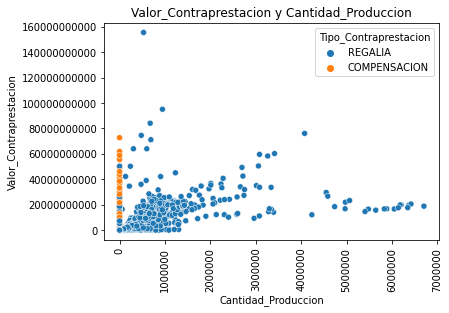

In [ ]:
ax=sns.scatterplot(x=df_produc_carbon['Cantidad_Produccion'], y=df_produc_carbon['Valor_Contraprestacion'], hue=df_produc_carbon['Tipo_Contraprestacion'])
plt.title('Valor_Contraprestacion y Cantidad_Produccion')
plt.ticklabel_format(style='sci', axis ='y', scilimits=(0,16))
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,7))
plt.xticks(rotation=90)


**Total producción de carbon por año**

Caido de la producción como consecuencia del COVID-19

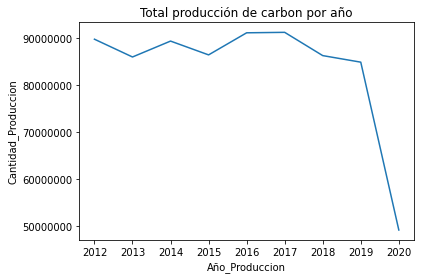

In [ ]:
sns.lineplot(x=df_produc_carbon['Año_Produccion'], y=df_produc_carbon['Cantidad_Produccion'], ci=None, estimator='sum')
plt.title('Total producción de carbon por año')
plt.ticklabel_format(style='sci', axis ='y', scilimits=(5,10))


 **Total Contraprestaciones por año**

En esta gráfica se observa el pago máximo y mínimo de regalias y compensaciones durante el periodo de 2012 a 2020, siendo 2020 el pago mínimo como consecuencia del COVID-19.

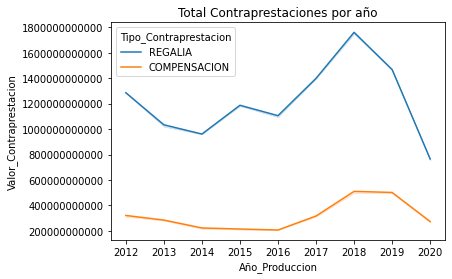

In [ ]:
sns.lineplot(x=df_produc_carbon['Año_Produccion'], y=df_produc_carbon['Valor_Contraprestacion'], hue=df_produc_carbon['Tipo_Contraprestacion'], ci=False, estimator='sum')
plt.title('Total Contraprestaciones por año')
plt.ticklabel_format(style='sci', axis ='y', scilimits=(2,18))

**Producción de carbon por Dpto**

Se Observa que el departamento del Cesar es el mayor productor de Carbon en Colombia, seguido por la Guajira 

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08, 4.0e+08, 4.5e+08]),
 <a list of 10 Text major ticklabel objects>)

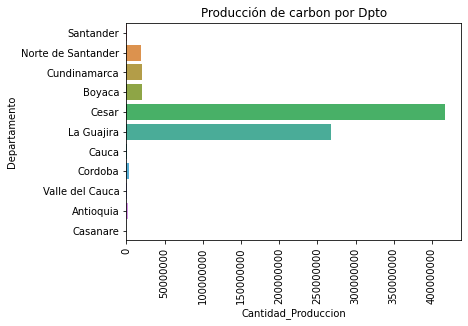

In [ ]:
sns.barplot(x=df_produc_carbon['Cantidad_Produccion'], y=df_produc_carbon['Departamento'], ci=None, estimator= sum)
plt.title('Producción de carbon por Dpto')
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,40))
plt.xticks(rotation=90)

**Contraprestaciones Economicas total por departamentos** 

Debido a que las regalias se liquidan en relación a la producción de Carbon, era claro desde la grafica anterior que el Dpto Cesar seria quien mayor cantidad genera. 

(array([0.e+00, 1.e+12, 2.e+12, 3.e+12, 4.e+12, 5.e+12, 6.e+12, 7.e+12,
        8.e+12]), <a list of 9 Text major ticklabel objects>)

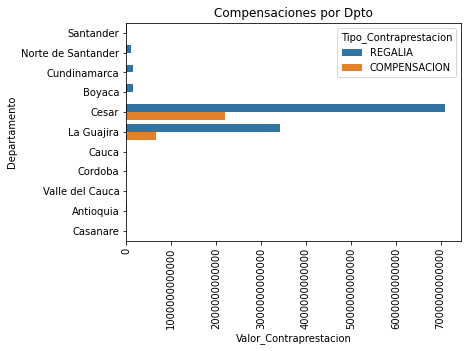

In [ ]:
sns.barplot(x=df_produc_carbon['Valor_Contraprestacion'], y=df_produc_carbon['Departamento'], hue=df_produc_carbon['Tipo_Contraprestacion'], estimator= sum,  ci=None)
plt.title('Compensaciones por Dpto')
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,70))
plt.xticks(rotation=90)

## **Agrupaciones de las variables** 

---



### **Produccion y contraprestaciones económicas totales por departamento**

In [ ]:
produccion_departamental = df_produc_carbon.groupby(['Departamento', 'Año_Produccion', 'Tipo_Contraprestacion'])['Departamento','Cantidad_Produccion', 'Valor_Contraprestacion' ].sum()
produccion_departamental.reset_index(inplace=True)
produccion_departamental.sort_values('Valor_Contraprestacion', inplace=True)
produccion_departamental

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Departamento,Año_Produccion,Tipo_Contraprestacion,Cantidad_Produccion,Valor_Contraprestacion
27,Casanare,2012,REGALIA,413,1.966923e+06
28,Casanare,2013,REGALIA,543,1.988866e+06
32,Casanare,2017,REGALIA,308,2.981859e+06
34,Casanare,2019,REGALIA,570,7.911356e+06
31,Casanare,2016,REGALIA,1986,9.531853e+06
...,...,...,...,...,...
51,Cesar,2015,REGALIA,45422164,7.846796e+11
45,Cesar,2012,REGALIA,46659338,8.096961e+11
55,Cesar,2017,REGALIA,50711219,8.438393e+11
59,Cesar,2019,REGALIA,52025239,9.694523e+11


### **Producción y contraprestaciones económicas totales por departamento y proyectos**

In [ ]:
produccion_carbon_proyectos = df_produc_carbon.groupby(['Departamento', 'Nombre_Proyecto','Año_Produccion', 'Tipo_Contraprestacion'])['Departamento','Valor_Contraprestacion', 'Cantidad_Produccion', 'Trimestre'].sum()
produccion_carbon_proyectos.reset_index(inplace=True)
produccion_carbon_proyectos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Departamento,Nombre_Proyecto,Año_Produccion,Tipo_Contraprestacion,Valor_Contraprestacion,Cantidad_Produccion
0,Antioquia,PRODUCTORES,2012,REGALIA,2.241777e+09,501654
1,Antioquia,PRODUCTORES,2013,REGALIA,1.335530e+09,332784
2,Antioquia,PRODUCTORES,2014,REGALIA,1.639407e+09,413440
3,Antioquia,PRODUCTORES,2015,REGALIA,9.204060e+08,216074
4,Antioquia,PRODUCTORES,2016,REGALIA,9.386258e+08,194864
...,...,...,...,...,...,...
267,Valle del Cauca,PRODUCTORES,2016,REGALIA,2.745395e+08,64364
268,Valle del Cauca,PRODUCTORES,2017,REGALIA,1.358260e+08,28057
269,Valle del Cauca,PRODUCTORES,2018,REGALIA,1.337117e+08,18073
270,Valle del Cauca,PRODUCTORES,2019,REGALIA,1.060881e+08,11744


## **Representación Gráfica de la Información**
---



### **Producción anual de carbón**

(array([50000000, 60000000, 70000000, 80000000, 90000000]),
 <a list of 5 Text major ticklabel objects>)

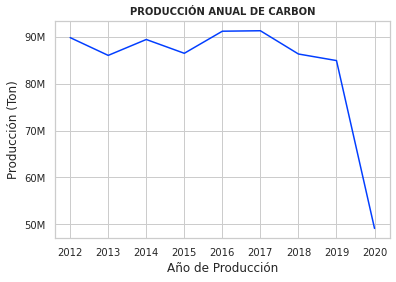

In [ ]:
fig = plt.figure(figsize=(6, 4))
sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif')
ax = sns.lineplot(x='Año_Produccion', y='Cantidad_Produccion', 
                    data=produccion_departamental, ci=None, estimator='sum')

tick_val = [50000000, 60000000, 70000000, 80000000, 90000000]
tick_lab = ['50M', '60M', '70M', '80M', '90M']
plt.yticks(tick_val, tick_lab)

plt.title('PRODUCCIÓN ANUAL DE CARBON', fontsize=10, fontweight='bold', horizontalalignment = 'center')
plt.xlabel('Año de Producción', fontsize=12)
plt.ylabel('Producción (Ton)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


### **Contraprestaciones y Regalías anuales**

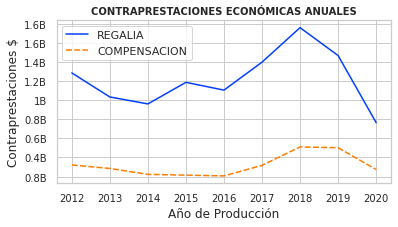

In [ ]:
fig = plt.figure(figsize=(6, 3))
sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif')
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', hue= 'Tipo_Contraprestacion',
                    data=produccion_departamental, 
                    ci=None, estimator='sum', style='Tipo_Contraprestacion')

tick_val = [200000000000, 400000000000, 600000000000, 
            800000000000, 1000000000000, 1200000000000, 
            1400000000000,1600000000000, 1800000000000]
tick_lab = ['0.8B', '0.4B', '0.6B', '0.8B', '1B', '1.2B',
            '1.4B', '1.6B', '1.6B']
plt.yticks(tick_val, tick_lab)


plt.title('CONTRAPRESTACIONES ECONÓMICAS ANUALES', fontsize=10, fontweight='bold', horizontalalignment = 'center')
plt.xlabel('Año de Producción', fontsize=12)
plt.ylabel('Contraprestaciones $', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()


### **Producción Anual de carbón por grandes, mediano y pequeños productores**

In [ ]:
union_grandes_productores = produccion_departamental.query('Departamento == ["Cesar", "La Guajira"]')

In [ ]:
union_medianos_productores = produccion_departamental.query('Departamento == ["Cundinamarca", "Boyaca", "Norte de Santander"]')

In [ ]:
union_pequeños_productores = produccion_departamental.query('Departamento == ["Santander", "Antioquia", "Valle del Cauca", "Cauca", "Cordoba", "Casanare"]')

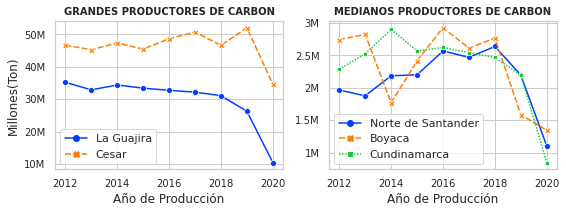

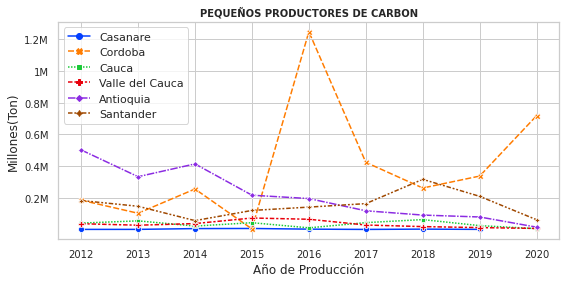

In [ ]:
fig = plt.figure(figsize=(9, 6))

plt.subplot(2,2,1)
ax = sns.lineplot(x='Año_Produccion', y='Cantidad_Produccion', 
                    data=union_grandes_productores, 
                    ci=None, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)

tick_val = [10000000, 20000000, 30000000, 40000000, 50000000]
tick_lab = ['10M', '20M', '30M', '40M', '50M']
plt.yticks(tick_val, tick_lab)
plt.title('GRANDES PRODUCTORES DE CARBON', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel('Millones(Ton)', fontsize = 12)
ax.tick_params(axis='both', labelsize=10)
plt.legend()

plt.subplot(2,2,2)
ax = sns.lineplot(x='Año_Produccion', y='Cantidad_Produccion', 
                    data=union_medianos_productores, 
                    ci=None, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)


tick_val = [1000000, 1500000, 2000000, 2500000, 3000000]
tick_lab = ['1M', '1.5M', '2M', '2.5M', '3M']
plt.yticks(tick_val, tick_lab)
plt.title('MEDIANOS PRODUCTORES DE CARBON', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel(None)
ax.tick_params(axis='both', labelsize=10)
ax = plt.legend()


#plt.subplot(2,2,3)
plt.figure(figsize=(8.98, 4))
ax = sns.lineplot(x='Año_Produccion', y='Cantidad_Produccion', 
                    data=union_pequeños_productores, 
                    ci=None, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)

plt.legend(loc="upper left", bbox_to_anchor=(1,1))
#plt.ticklabel_format(style='sci', axis ='y', scilimits=(0,12))
tick_val = [200000, 400000, 600000, 800000, 1000000, 1200000]
tick_lab = ['0.2M', '0.4M', '0.6M', '0.8M', '1M', '1.2M']
plt.yticks(tick_val, tick_lab)
plt.title('PEQUEÑOS PRODUCTORES DE CARBON', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel('Millones(Ton)', fontsize = 12)
ax.tick_params(axis='both', labelsize=10)
plt.legend()

### **Regalías Anual de Carbón por grandes, medianos y pequeños productores**

In [ ]:
regalia_grandes_productores = union_grandes_productores[union_grandes_productores['Tipo_Contraprestacion'] == "REGALIA"]

In [ ]:
regalia_medianos_productores = union_medianos_productores[union_medianos_productores['Tipo_Contraprestacion'] == "REGALIA"]

In [ ]:
regalia_pequeños_productores = union_pequeños_productores[union_pequeños_productores['Tipo_Contraprestacion'] == "REGALIA"]

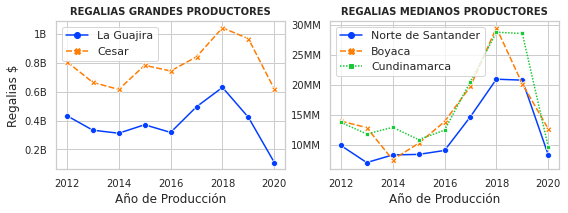

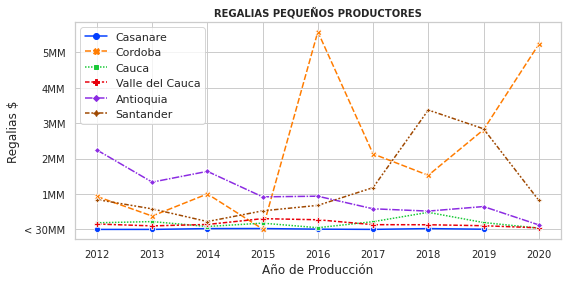

In [ ]:
fig = plt.figure(figsize=(9, 6))

plt.subplot(2,2,1)
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', 
                    data=regalia_grandes_productores, 
                    ci=False, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)

tick_val = [200000000000, 400000000000, 600000000000, 800000000000, 1000000000000]
tick_lab = ['0.2B', '0.4B', '0.6B', '0.8B', '1B']
plt.yticks(tick_val, tick_lab)
plt.title('REGALIAS GRANDES PRODUCTORES', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel('Regalias $', fontsize = 12)
ax.tick_params(axis='both', labelsize=10)
plt.legend()

plt.subplot(2,2,2)
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', 
                    data=regalia_medianos_productores, 
                    ci=False, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)

tick_val = [10000000000, 15000000000, 20000000000, 25000000000, 30000000000]
tick_lab = ['10MM', '15MM', '20MM', '25MM', '30MM']
plt.yticks(tick_val, tick_lab)
plt.title('REGALIAS MEDIANOS PRODUCTORES', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel(None)
ax.tick_params(axis='both', labelsize=10)
ax = plt.legend()


#plt.subplot(2,2,3)
plt.figure(figsize=(8.71, 4))
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', 
                    data=regalia_pequeños_productores, 
                    ci=False, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)

plt.legend(loc="upper left", bbox_to_anchor=(1,1))
tick_val = [0, 1000000000, 2000000000, 3000000000, 4000000000, 5000000000]
tick_lab = ['< 30MM', '1MM', '2MM', '3MM', '4MM', '5MM']
plt.yticks(tick_val, tick_lab)
plt.title('REGALIAS PEQUEÑOS PRODUCTORES', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel('Regalias $', fontsize = 12)
ax.tick_params(axis='both', labelsize=10)
plt.legend()

### **Compensación Anual de Carbón por grandes, medianos y pequeños productores**

In [ ]:
compensaciones_grandes_productores = union_grandes_productores[union_grandes_productores['Tipo_Contraprestacion'] == "COMPENSACION"]

In [ ]:
compensaciones_medianos_productores = union_medianos_productores[union_medianos_productores['Tipo_Contraprestacion'] == "COMPENSACION"]

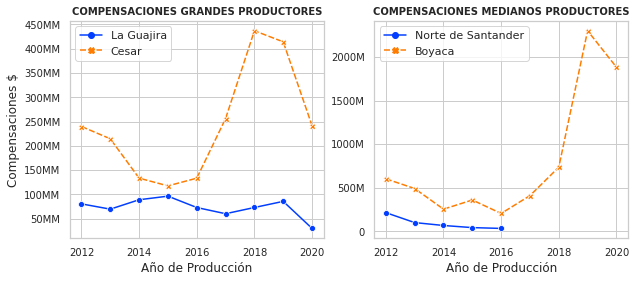

In [ ]:
fig = plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', 
                    data=compensaciones_grandes_productores, 
                    ci=False, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)

plt.ticklabel_format(style='sci', axis ='y', scilimits=(5,45))
tick_val = [50000000000, 100000000000, 150000000000, 200000000000, 250000000000, 300000000000, 350000000000, 400000000000, 450000000000]
tick_lab = ['50MM', '100MM', '150MM', '200MM', '250MM', '300MM', '350MM', '400MM', '450MM']
plt.yticks(tick_val, tick_lab)
plt.title('COMPENSACIONES GRANDES PRODUCTORES', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel('Compensaciones $', fontsize = 12)
ax.tick_params(axis='both', labelsize=10)
plt.legend()

plt.subplot(1,2,2)
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', 
                    data=compensaciones_medianos_productores, 
                    ci=False, estimator='sum', hue='Departamento', style = 'Departamento', markers=True)

#plt.ticklabel_format(style='sci', axis ='y', scilimits=(0,20))
tick_val = [0, 500000000, 1000000000, 1500000000, 2000000000]
tick_lab = ['0', '500M', '1000M', '1500M', '2000M']
plt.yticks(tick_val, tick_lab)
plt.title('COMPENSACIONES MEDIANOS PRODUCTORES', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel(None)
ax.tick_params(axis='both', labelsize=10)
ax = plt.legend()




**NOTA:**

Los departamentos clasificados como pequeños productores, no reportan generación de contraprestaciones económicos por concepto de COMPENSACION

### **Proyectos que han pagado compensaciones al Estado Colombiano**

In [ ]:
compensaciones_por_proyectos = produccion_carbon_proyectos.query('Tipo_Contraprestacion  == "COMPENSACION"')
proyectos_compensaciones = compensaciones_por_proyectos.groupby(['Departamento', 'Año_Produccion', 'Nombre_Proyecto'])['Valor_Contraprestacion', 'Cantidad_Produccion'].sum()
proyectos_compensaciones.reset_index(inplace=True)
proyectos_compensaciones.sort_values('Valor_Contraprestacion', inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
proyectos_compensaciones

,Departamento,Año_Produccion,Nombre_Proyecto,Valor_Contraprestacion,Cantidad_Produccion
32,Cesar,2016,CARBONES EL TESORO,3.901000e+04,0
41,Cesar,2018,PRODECO - CALENTURITAS,1.282320e+05,0
28,Cesar,2015,CARBONES EL TESORO,2.916620e+06,0
45,Cesar,2019,PRODECO - CALENTURITAS,7.274182e+06,0
68,Norte de Santander,2016,PRODUCTORES,3.279372e+07,0
...,...,...,...,...,...
12,Cesar,2012,Drummond - El Descanso,1.598980e+11,0
36,Cesar,2017,Drummond - El Descanso,2.303124e+11,0
47,Cesar,2020,Drummond - El Descanso,2.334270e+11,0
43,Cesar,2019,Drummond - El Descanso,3.721748e+11,0


In [ ]:
union_macro_compensaciones = proyectos_compensaciones.query('Nombre_Proyecto == ["Drummond - El Descanso", "CERREJON  CZN - CEMT", "EL HATILLO CNR"]')
union_macro_compensaciones

,Departamento,Año_Produccion,Nombre_Proyecto,Valor_Contraprestacion,Cantidad_Produccion
31,Cesar,2015,EL HATILLO CNR,1.071967e+09,0
48,Cesar,2020,EL HATILLO CNR,4.722670e+09,0
37,Cesar,2017,EL HATILLO CNR,9.349667e+09,0
44,Cesar,2019,EL HATILLO CNR,2.720353e+10,0
62,La Guajira,2020,CERREJON CZN - CEMT,2.743490e+10,0
20,Cesar,2013,EL HATILLO CNR,3.502074e+10,0
13,Cesar,2012,EL HATILLO CNR,3.796114e+10,0
58,La Guajira,2018,CERREJON CZN - CEMT,4.611753e+10,0
40,Cesar,2018,EL HATILLO CNR,4.612017e+10,0
55,La Guajira,2016,CERREJON CZN - CEMT,5.820834e+10,0


In [ ]:
union_compensaciones_intermedias = proyectos_compensaciones.query('Nombre_Proyecto == ["CARBONES DE LA JAGUA S.A.", "CERREJON - PATILLA", "CONSORCIO MINERO UNIDO S.A."]')

In [ ]:
union_micro_compensaciones = proyectos_compensaciones.query('Nombre_Proyecto == ["CARBONES EL TESORO" , "PRODECO - CALENTURITAS", "PRODUCTORES", "MINAS PAZ DEL RIO S.A.", "NORCARBON"]')

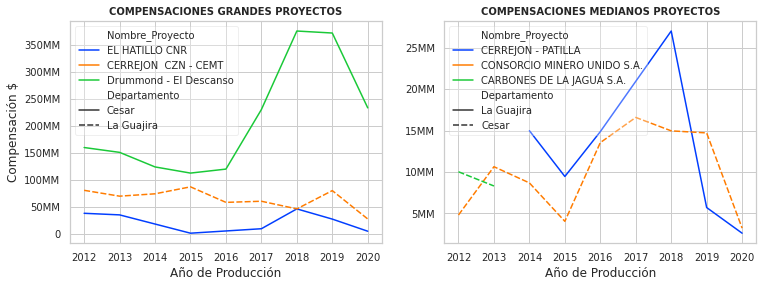

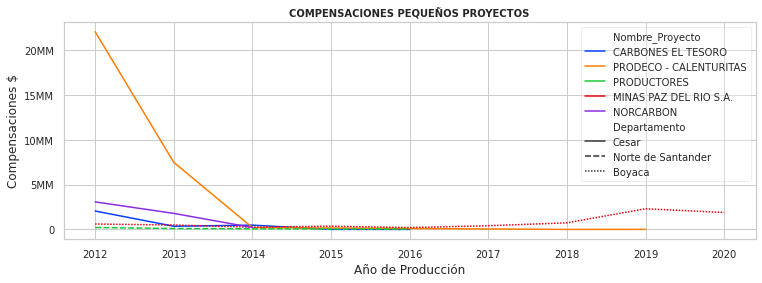

In [ ]:
fig = plt.figure(figsize=(12.3, 9))

plt.subplot(2,2,1)
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', hue= 'Nombre_Proyecto',
                    data=union_macro_compensaciones, 
                    ci=None, estimator='sum', style='Departamento')

tick_val = [0, 50000000000, 100000000000, 150000000000, 200000000000, 250000000000, 300000000000, 350000000000]
tick_lab = ['0', '50MM', '100MM', '150MM', '200MM', '250MM', '300MM', '350MM']
plt.yticks(tick_val, tick_lab)
plt.title('COMPENSACIONES GRANDES PROYECTOS', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel('Compensación $', fontsize = 12)
ax.tick_params(axis='both', labelsize=10)
ax=plt.legend(fontsize = 10, framealpha = 0.3)

plt.subplot(2,2,2)
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', hue= 'Nombre_Proyecto',
                    data=union_compensaciones_intermedias, 
                    ci=None, estimator='sum', style='Departamento')


plt.ticklabel_format(style='sci', axis ='y', scilimits=(5,25))
tick_val = [5000000000, 10000000000, 15000000000, 20000000000, 25000000000]
tick_lab = ['5MM', '10MM', '15MM', '20MM', '25MM']
plt.yticks(tick_val, tick_lab)
plt.title('COMPENSACIONES MEDIANOS PROYECTOS', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel(None)
ax.tick_params(axis='both', labelsize=10)
ax = plt.legend(fontsize = 10, framealpha = 0.3)


#plt.subplot(2,2,3)
plt.figure(figsize=(12.4, 4))
ax = sns.lineplot(x='Año_Produccion', y='Valor_Contraprestacion', hue= 'Nombre_Proyecto',
                    data=union_micro_compensaciones, 
                    ci=None, estimator='sum', style='Departamento')

tick_val = [0, 5000000000, 10000000000, 15000000000, 20000000000]
tick_lab = ['0', '5MM', '10MM', '15MM', '20MM']
plt.yticks(tick_val, tick_lab)
plt.title('COMPENSACIONES PEQUEÑOS PROYECTOS', fontsize = 10, fontweight="bold")
ax.set_xlabel('Año de Producción', fontsize = 12)
ax.set_ylabel('Compensaciones $', fontsize = 12)
ax.tick_params(axis='both', labelsize=10)
ax = plt.legend(fontsize = 10, framealpha = 0.3)

## **Conclusiones Finales**

1. En cifras, la caída de la producción de carbón entre el 2019 y el 2020 fue del 58%. Mientras que, la reducción de las regalías en este mismo periodo fue del 52%

2. El pago de compensaciones ha sido liquidado por proyectos mineros ubicados en los departamentos de grandes productores (La Guajira y Cesar) y medianos productores (Boyacá y Norte de Santander). Esto significa que las compensaciones se ejecutan en proporción a la magnitud del proyecto y por tanto, la mayor probabilidad de ocasionar consecuencias negativas. 


# **Medidas de Tendencia central, Dispersión y Regresión Lineal**

In [ ]:
contraprestación_compensacion = produccion_departamental[produccion_departamental['Tipo_Contraprestacion'] == "COMPENSACION"]
contraprestación_regalia = produccion_departamental[produccion_departamental['Tipo_Contraprestacion'] == "REGALIA"]

Covarianza entre produccion- regalias 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([-10000000.,         0.,  10000000.,  20000000.,  30000000.,
         40000000.,  50000000.,  60000000.]),
 <a list of 8 Text major ticklabel objects>)

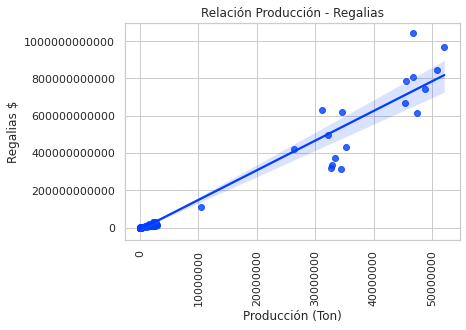

In [ ]:
sns.regplot(contraprestación_regalia['Cantidad_Produccion'], contraprestación_regalia['Valor_Contraprestacion'])
plt.title('Relación Producción - Regalias')
plt.ylabel('Regalias $')
plt.xlabel('Producción (Ton)')
plt.ticklabel_format(style='sci', axis ='y', scilimits=(0,100))
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,50))
plt.xticks(rotation=90)

In [ ]:
matriz_covarianza_regalia = np.cov(contraprestación_regalia['Cantidad_Produccion'], contraprestación_regalia['Valor_Contraprestacion'])
matriz_covarianza_regalia

array([[2.30704312e+14, 3.67626067e+18],
       [3.67626067e+18, 6.21732495e+22]])

**NOTA:**

      La covarianza en el eje X es **2.30704312e+14**
      
      La covarianza en el eje Y es **6.21732495e+22**

      La covarianza entre el eje X, Y  es **3.67626067e+18**
      

---



Covarianza entre produccion- compensación

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Producción (Ton)')

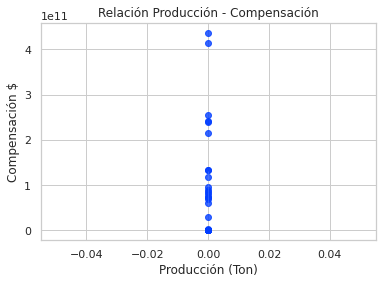

In [ ]:
sns.regplot(contraprestación_compensacion['Cantidad_Produccion'], contraprestación_compensacion['Valor_Contraprestacion'])
plt.title('Relación Producción - Compensación')
plt.ylabel('Compensación $')
plt.xlabel('Producción (Ton)')

In [ ]:
matriz_covarianza_compensacion = np.cov(contraprestación_compensacion['Cantidad_Produccion'], contraprestación_compensacion['Valor_Contraprestacion'])
matriz_covarianza_compensacion

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.40669511e+22]])

**NOTA:**

      La covarianza en el eje X es **0.00000000e+00**
      
      La covarianza en el eje Y es **1.40669511e+22**

      La covarianza entre el eje X, Y  es **0.00000000e+00**
      

---



## **Coeficiente de correlación de Pearson**

Coeficiente de correlacion produccion- regalias

In [ ]:
def correlacion_pearson(x, y):
    matriz_correlacion = np.corrcoef(x, y)

    return matriz_correlacion[0,1] # x, y

r = correlacion_pearson(contraprestación_regalia['Cantidad_Produccion'], 
              contraprestación_regalia['Valor_Contraprestacion'])
         
print(r)


0.9706812918468922


Coeficiente de correlacion produccion- compensación 

In [ ]:
def correlacion_pearson(x, y):
    matriz_correlacion = np.corrcoef(x, y)

    return matriz_correlacion[0,1] # x, y

r = correlacion_pearson(contraprestación_compensacion['Cantidad_Produccion'], 
              contraprestación_compensacion['Valor_Contraprestacion'])
         
print(r)

nan


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## **Distribución Gaussiana Producción de Carbón**

In [ ]:
def ecdf(n_defaults):
    n = len(n_defaults)
    x = np.sort(n_defaults)
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
media_aritmetica = np.mean(contraprestación_regalia['Cantidad_Produccion'])
desviacion_estandar = np.std(contraprestación_regalia['Cantidad_Produccion'])

In [ ]:
muestra = np.random.normal(media_aritmetica, desviacion_estandar, 10000)

In [ ]:
x, y = ecdf(contraprestación_regalia['Cantidad_Produccion'])
x_teorico, y_teorico = ecdf(muestra)

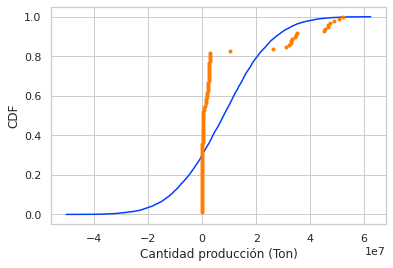

In [ ]:
plt.plot(x_teorico, y_teorico) #CDF --> función de distribución acumulada (Azul)
plt.plot(x, y, marker='.', linestyle='none') # ECDF --> Función de distribución empírica (Naranja)
plt.xlabel('Cantidad producción (Ton)')
plt.ylabel('CDF')
plt.show()

In [ ]:
probabilidad_cantidad = np.sum(muestra <=1000)/len(muestra)
print('La probabilidad de tener una producción menor a 800 Ton es:', probabilidad_cantidad)

La probabilidad de tener una producción menor a 800 Ton es: 0.3017


# **Distribución Gaussiana Regalias del Carbón**

In [ ]:
media_arit = np.mean(contraprestación_regalia['Valor_Contraprestacion'])
desv_estandar = np.std(contraprestación_regalia['Valor_Contraprestacion'])

In [ ]:
la_muestra = np.random.normal(media_arit, desv_estandar, 10000)

In [ ]:
x, y = ecdf(contraprestación_regalia['Valor_Contraprestacion'])
x_teorico, y_teorico = ecdf(la_muestra)

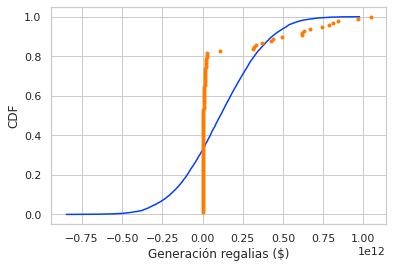

In [ ]:
plt.plot(x_teorico, y_teorico) #CDF --> función de distribución acumulada (Azul)
plt.plot(x, y, marker='.', linestyle='none') # ECDF --> Función de distribución empírica (Naranja)
plt.xlabel('Generación regalias ($)')
plt.ylabel('CDF')
plt.show()

In [ ]:
contraprestación_regalia['Valor_Contraprestacion'].min()

1966923.0

In [ ]:
probabilidad_regalias = np.sum(la_muestra <= 2000000)/len(la_muestra)
print('La probabilidad de generar regalias menores a 800.000 es:', probabilidad_regalias)

La probabilidad de generar regalias menores a 800.000 es: 0.327


# **Regresión lineal**

slope = 15934.945665472955 Producción carbón / Generación regalias
intercept = -10724609037.767477 Producción carbón


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


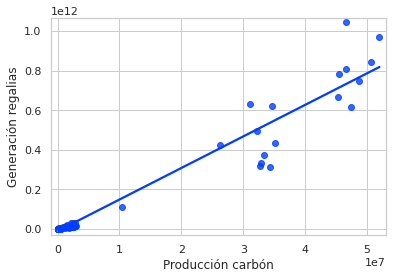

In [ ]:
# Plot the illiteracy rate versus fertility
sns.regplot(contraprestación_regalia['Cantidad_Produccion'], contraprestación_regalia['Valor_Contraprestacion'], ci=None)
plt.margins(0.02)
_ = plt.xlabel('Producción carbón')
_ = plt.ylabel('Generación regalias')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(contraprestación_regalia['Cantidad_Produccion'], contraprestación_regalia['Valor_Contraprestacion'], 1)

# Print the results to the screen
print('slope =', a, 'Producción carbón / Generación regalias')
print('intercept =', b, 'Producción carbón')

# Make theoretical line to plot
x = np.array([0, 1000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

15934.945665474017 -10724609037.767477


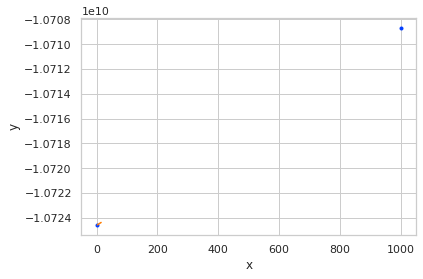

In [ ]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()